# Ten thousand tweets as @BrainStraining

Today, I reached my 9,999 using the handle [@BrainStraining](https://twitter.com/BrainStraining). For my 10,000th tweet I wanted to both celebrate and see how I got here.  Earlier in the year I read a wonderfully geeky blog post by Julia Silge who used RStats to run some [cool analyses on her own first 10,000 tweets](http://juliasilge.com/blog/Ten-Thousand-Tweets/). The blog post contained her code. This seemed like a great idea so I am forking it.

Since I doubt I can add much to the good work that Julia did on the analysis side, I thought I'd see if I could add anything on the sharing side. I thought I'd try using a combination of Jupyter notebooks and Github. This is the result. 

Share and enjoy,  
Caspar  
[@BrainStraining](https://twitter.com/BrainStraining)
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>


OK, let's go. First we need a few libraries. Surprisingly few.. Mainly due to the awesome power of `ggplot2` :)

And the tweets. We'll need those. Twitter has a handy button on your settings page that provides you will everything as a handy csv archive. If your unsure about that follow [these instructions](https://support.twitter.com/articles/20170160). Incidentally, the archive comes with quite a nice browser which lets you navigate your offline tweets by month. Well played, Twitter.

In [8]:
library(ggplot2)
library(lubridate)
library(scales)

tweets <- read.csv("./tweets.csv", stringsAsFactors = FALSE)

Next we need to convert the timestamps from UTC to local time, which in my case is London. Julia did this using the `lubridate` package. Sounds good to me.

In [9]:
tweets$timestamp <- ymd_hms(tweets$timestamp)
tweets$timestamp <- with_tz(tweets$timestamp, "Europe/London")

# Tweets by Year, Month and Day

Some basic historgrams

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


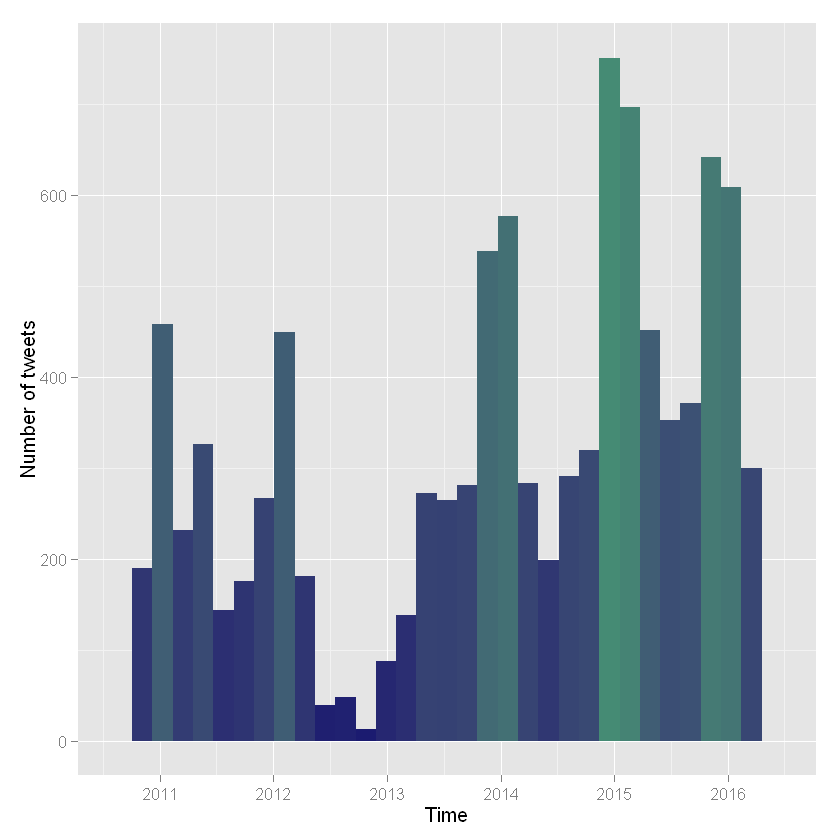

In [10]:
ggplot(data = tweets, aes(x = timestamp)) +
        geom_histogram(aes(fill = ..count..)) +
        theme(legend.position = "none") +
        xlab("Time") + ylab("Number of tweets") + 
        scale_fill_gradient(low = "midnightblue", high = "aquamarine4")

Alerady we're on to something interesting. It seems I am a highly seasonal tweeter. December and especially January seem to be my noisiest times of the year. January certainly makes sense. I love New Years and always start the year off full of enthusiasm and Curiously, the Twitter interface also provides a histogram by month. But the pattern doesn't leap out at you here.  
<img alt="Twitters monthly histograms" style="border-width:0" src="./twitter.histogram.png" />

The bins on that first graph aren't perfect. Let's group all my data by month to see things more clearly.

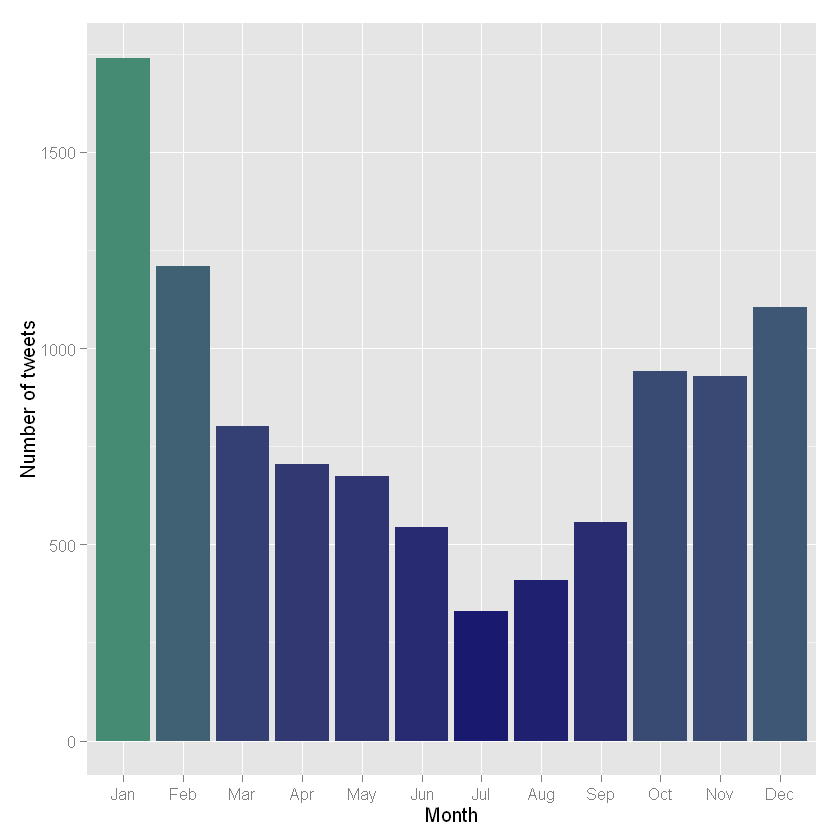

In [18]:
ggplot(data = tweets, aes(x = month(timestamp, label = TRUE))) +
        geom_histogram(aes(fill = ..count..)) +
        theme(legend.position = "none") +
        xlab("Month") + ylab("Number of tweets") + 
        scale_fill_gradient(low = "midnightblue", high = "aquamarine4")

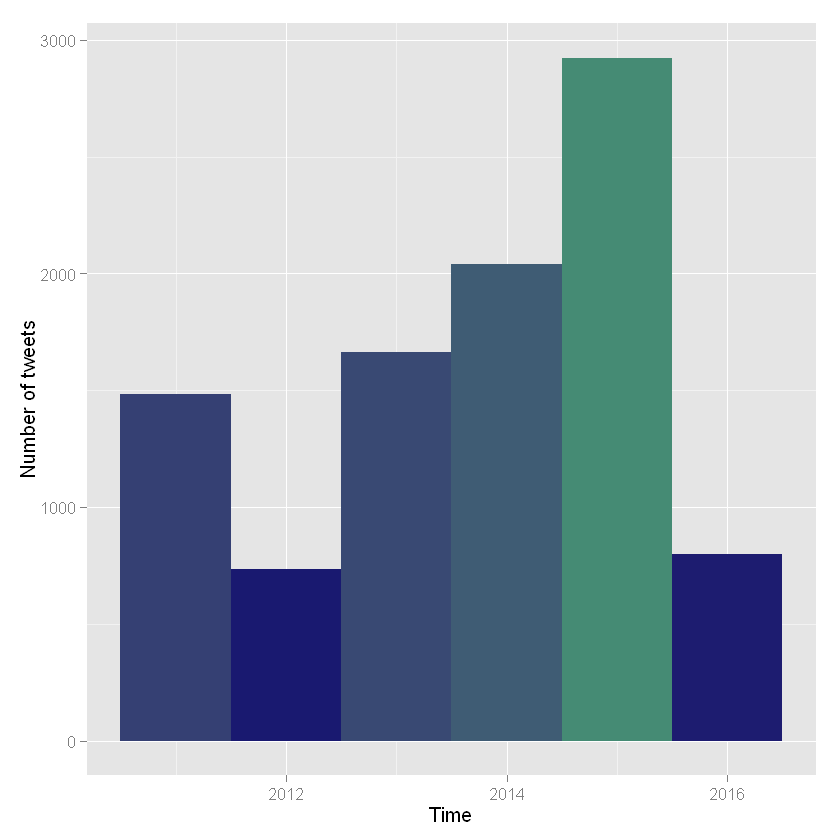

In [15]:
## By year

ggplot(data = tweets, aes(x = year(timestamp))) +
        geom_histogram(breaks = seq(2010.5, 2016.5, by =1), aes(fill = ..count..)) +
        theme(legend.position = "none") +
        xlab("Time") + ylab("Number of tweets") + 
        scale_fill_gradient(low = "midnightblue", high = "aquamarine4")

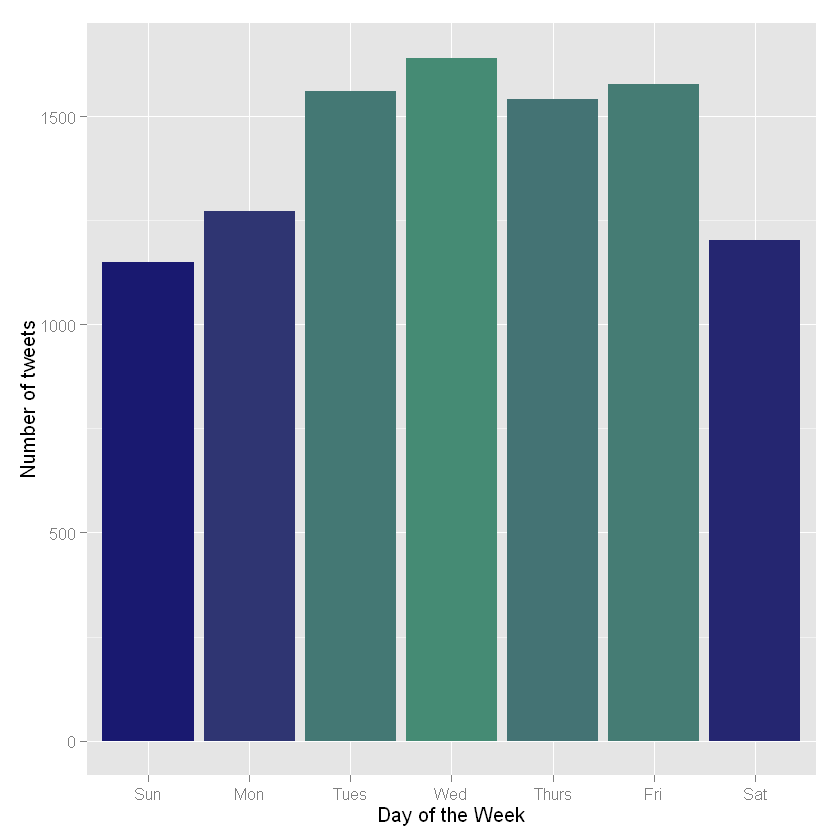

In [16]:
ggplot(data = tweets, aes(x = wday(timestamp, label = TRUE))) +
        geom_histogram(breaks = seq(0.5, 7.5, by =1), aes(fill = ..count..)) +
        theme(legend.position = "none") +
        xlab("Day of the Week") + ylab("Number of tweets") + 
        scale_fill_gradient(low = "midnightblue", high = "aquamarine4")

In [ ]:
I am a humpday poster. As Julia points out o

In [17]:
chisq.test(table(wday(tweets$timestamp, label = TRUE)))



	Chi-squared test for given probabilities

data:  table(wday(tweets$timestamp, label = TRUE))
X-squared = 175.5242, df = 6, p-value < 2.2e-16
